<a href="https://colab.research.google.com/github/niki-0904/ML-PROJECT/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

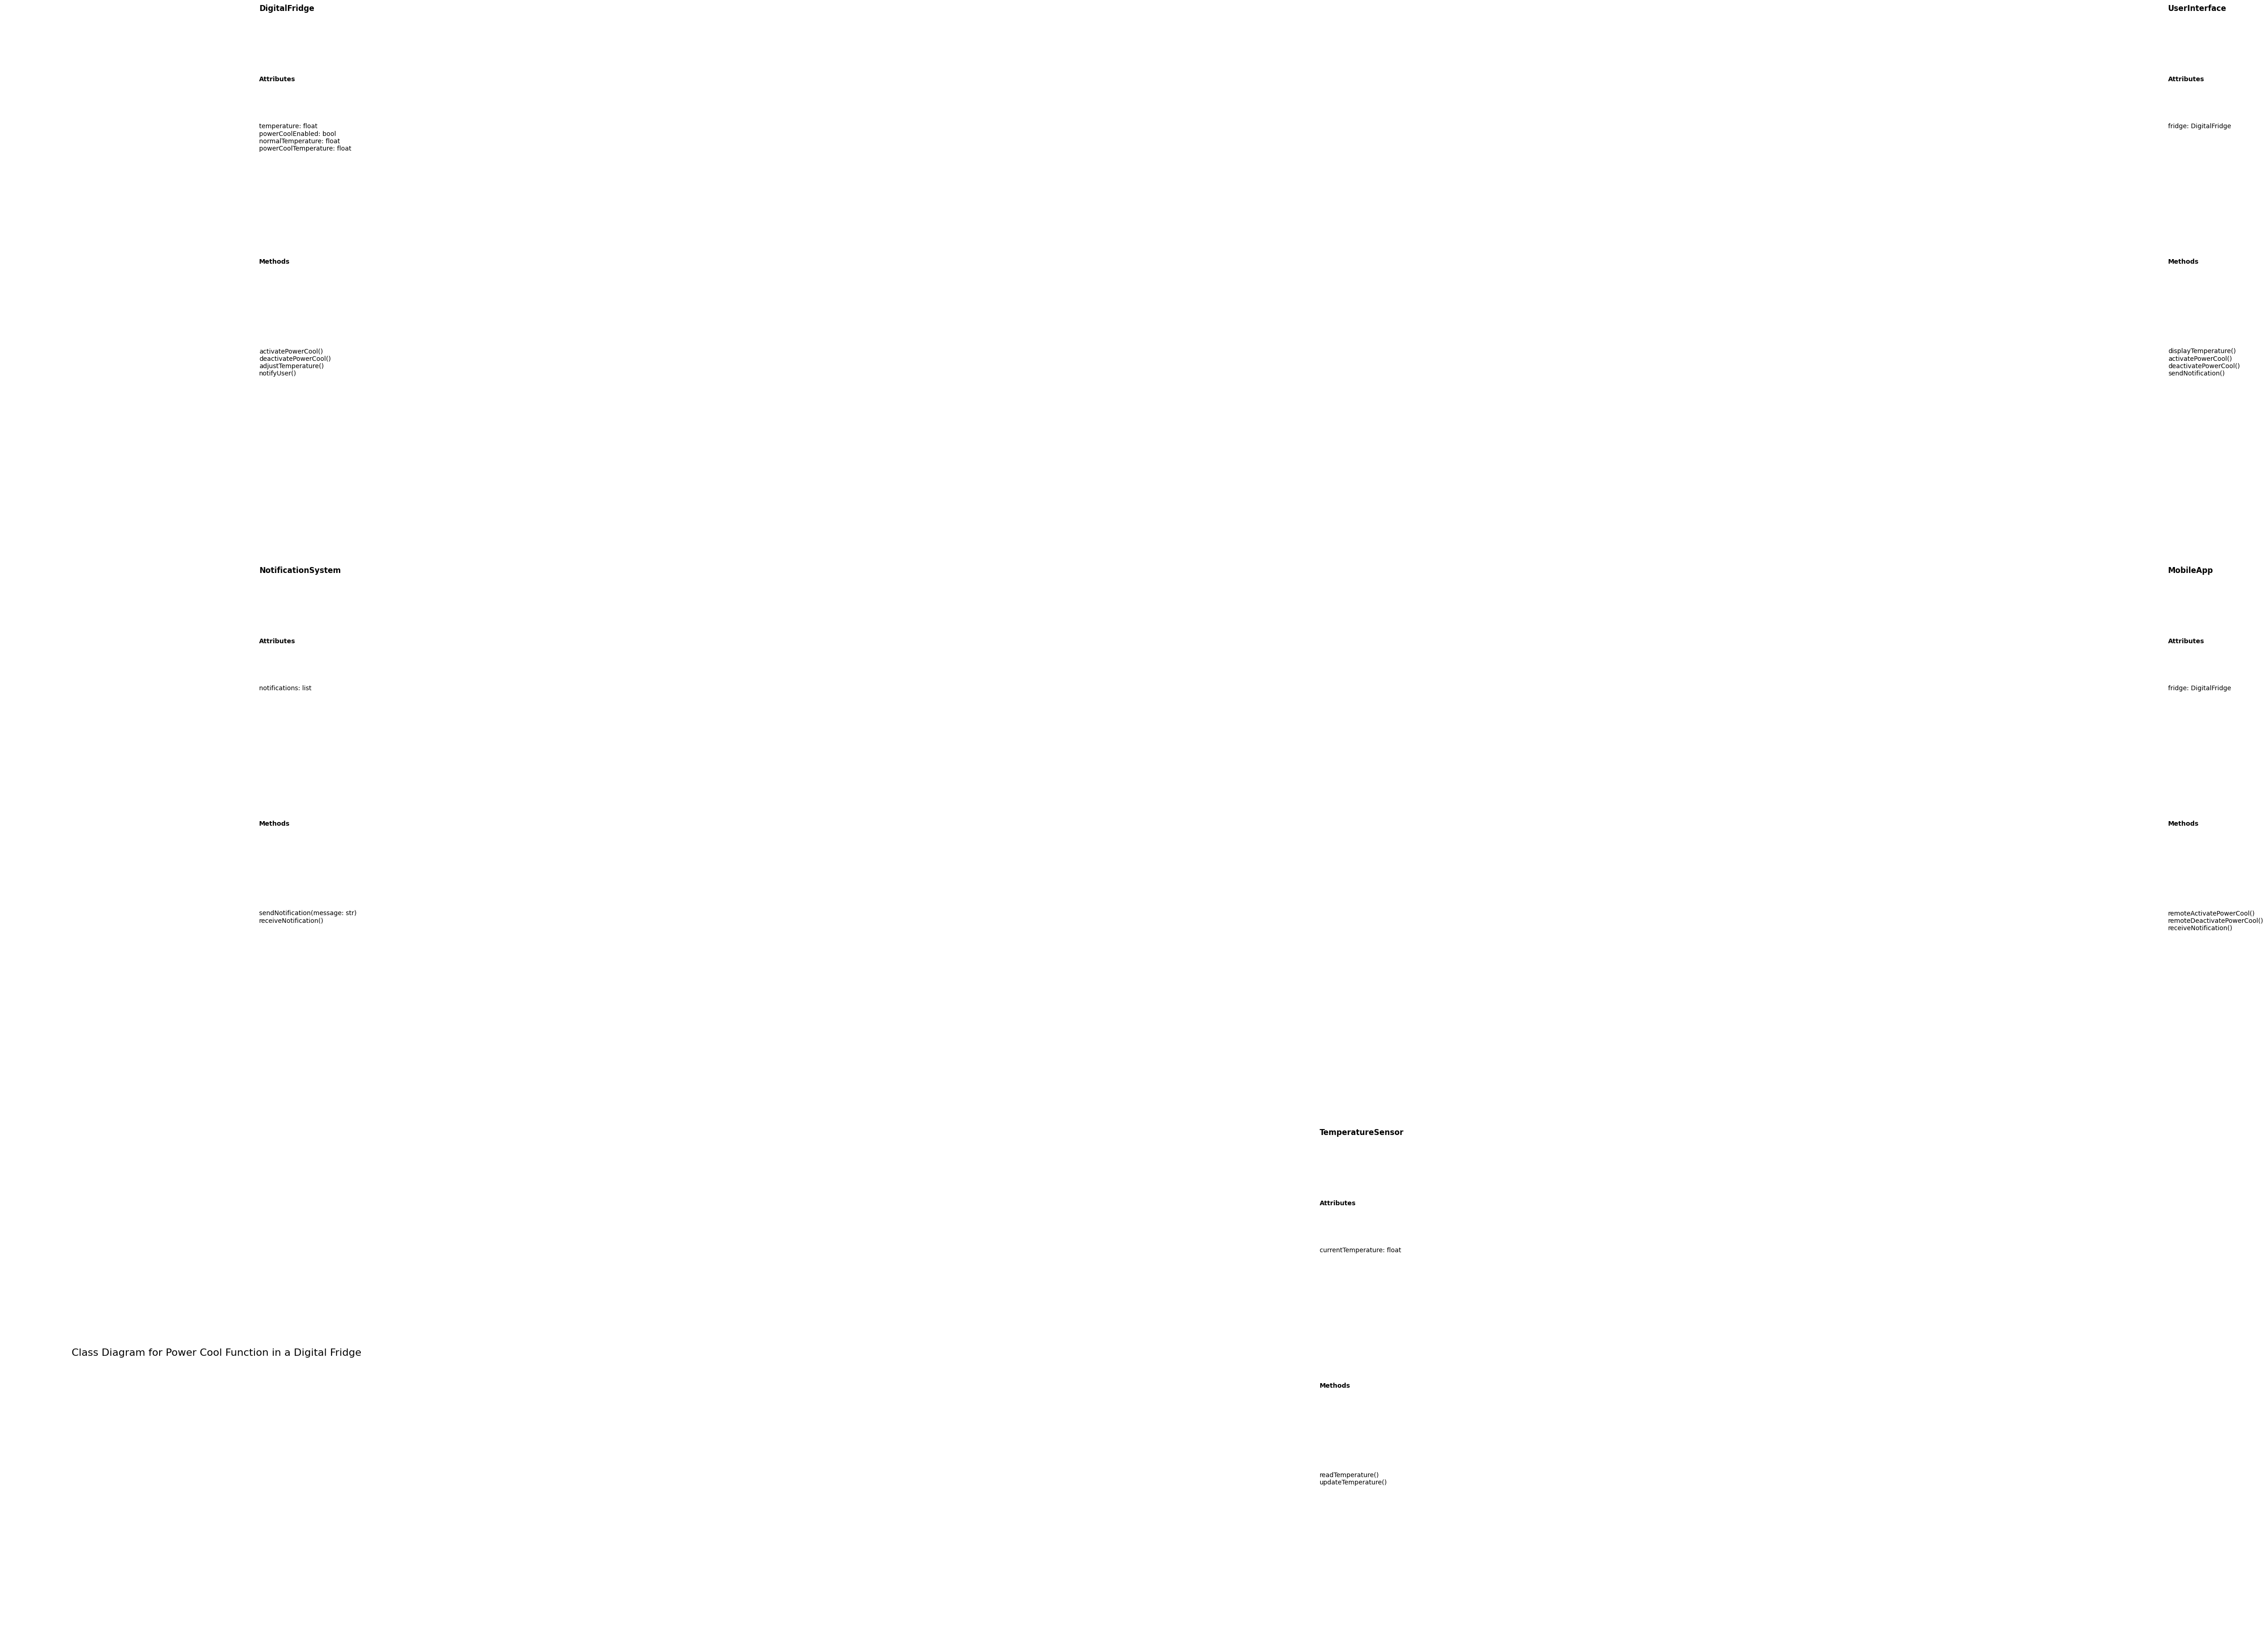

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Function to draw a class box
def draw_class(ax, name, attributes, methods, xy):
    ax.add_patch(FancyBboxPatch(xy, 3.5, 1.5, boxstyle="round,pad=0.1", edgecolor='black', facecolor='none'))
    ax.text(xy[0] + 0.1, xy[1] + 1.3, name, fontsize=12, ha='left', fontweight='bold')
    ax.text(xy[0] + 0.1, xy[1] + 1.05, 'Attributes', fontsize=10, ha='left', fontweight='bold')
    ax.text(xy[0] + 0.1, xy[1] + 0.9, attributes, fontsize=10, ha='left', va='top')
    ax.text(xy[0] + 0.1, xy[1] + 0.4, 'Methods', fontsize=10, ha='left', fontweight='bold')
    ax.text(xy[0] + 0.1, xy[1] + 0.1, methods, fontsize=10, ha='left', va='top')

# Draw the classes
draw_class(ax, 'DigitalFridge',
           'temperature: float\npowerCoolEnabled: bool\nnormalTemperature: float\npowerCoolTemperature: float',
           'activatePowerCool()\ndeactivatePowerCool()\nadjustTemperature()\nnotifyUser()', (0.5, 4.5))

draw_class(ax, 'UserInterface',
           'fridge: DigitalFridge',
           'displayTemperature()\nactivatePowerCool()\ndeactivatePowerCool()\nsendNotification()', (5, 4.5))

draw_class(ax, 'MobileApp',
           'fridge: DigitalFridge',
           'remoteActivatePowerCool()\nremoteDeactivatePowerCool()\nreceiveNotification()', (5, 2.5))

draw_class(ax, 'NotificationSystem',
           'notifications: list',
           'sendNotification(message: str)\nreceiveNotification()', (0.5, 2.5))

draw_class(ax, 'TemperatureSensor',
           'currentTemperature: float',
           'readTemperature()\nupdateTemperature()', (3, 0.5))

# Draw relationships (lines)
ax.annotate('', xy=(3.5, 4.5), xytext=(3.5, 6),
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate('', xy=(7.5, 4.5), xytext=(5.5, 4.5),
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate('', xy=(7.5, 3), xytext=(5.5, 3),
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate('', xy=(2, 3.5), xytext=(2, 4.5),
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate('', xy=(3.5, 2), xytext=(3.5, 2.5),
            arrowprops=dict(arrowstyle="->", lw=1.5))

# Title and labels
ax.set_title("Class Diagram for Power Cool Function in a Digital Fridge", fontsize=16)
ax.axis('off')

# Show the diagram
plt.show()


Accuracy: 0.94
Confusion Matrix:
[[ 57   6]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



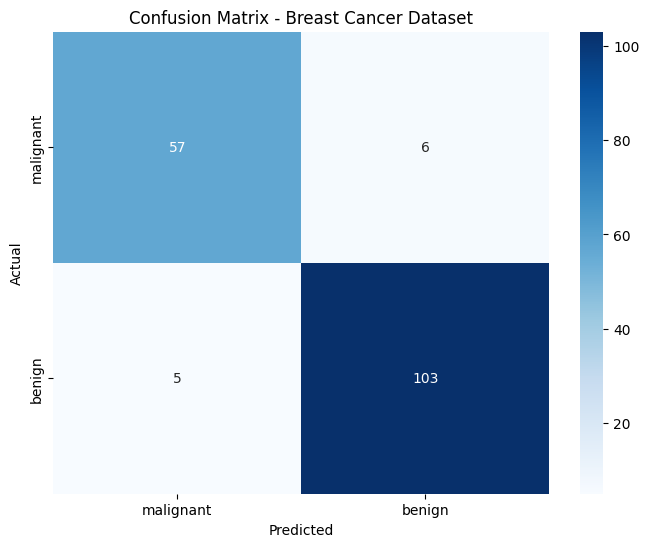

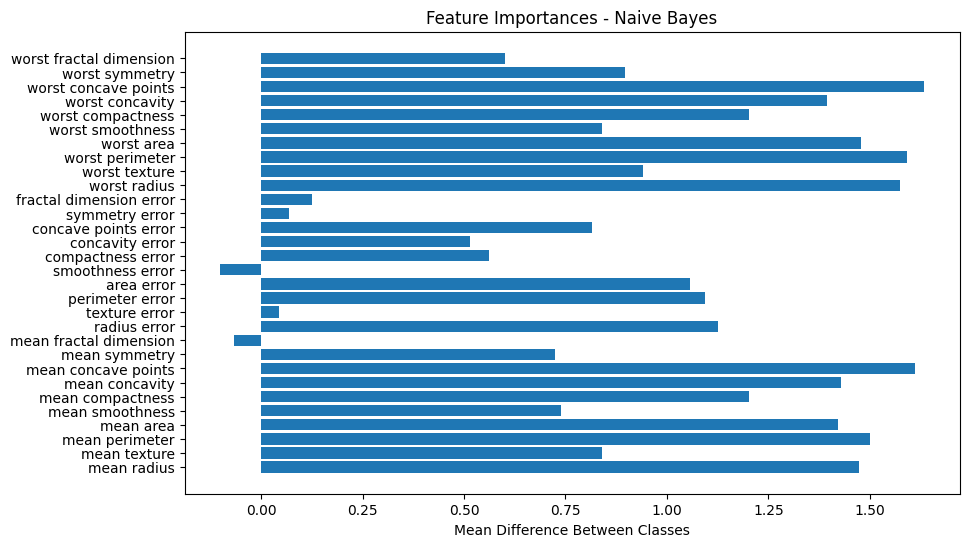

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (Naive Bayes doesn't necessarily require this, but it's good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix - Breast Cancer Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot feature importances (mean, variance ratio in GaussianNB)
plt.figure(figsize=(10, 6))
plt.barh(range(len(gnb.theta_[0])), gnb.theta_[0] - gnb.theta_[1], align='center')
plt.yticks(range(len(data.feature_names)), data.feature_names)
plt.title('Feature Importances - Naive Bayes')
plt.xlabel('Mean Difference Between Classes')
plt.show()



In [ ]:
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#Load penguin dataset from seaborn
penguins=sns.load_dataset('penguins')

#Display the first few rows and inspect the columns
print(penguins.head())

#Data preprocessing
#Drop rows with missing values

penguins.dropna(inplace=True)

#Select features (numerical only for simplicity)
x=penguins[['bill_length_mm', 'bill_depth_mm']].values
y=penguins['species'].values

#Encode categorical target variable 'species' to numerical labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

#Data preprocessing (scaling numerical features)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test size-0.2, random_state=42

#SVM Classifier model (example with linear kernel)
clf= svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

#Predictions
y_pred=clf.predict(X_test)

#Evaluate the model
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: (accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#Plotting the decision boundary (for 20 data only)
If X.shape[1]-2:

            #Create a meshgrid of points
            x_min, x_max=X[:, 0].min()-1, X[:, 0].max() + 1
            y_min, y_max=X[:, 1].min()-1, X[:, 1].max() +1
            xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

            #Plot decision boundary and margins
            z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z=Z.reshape(xx.shape)
            plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha-0.8)
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue-penguins['species'], palette='viridis', edgecolor='k')
            plt.xlabel("Bill Length (mm)")
            plt.ylabel('Bill Depth (mm)')
            plt.title('SVIM Decision Boundary for Penguin Species')
            plt.legend(loc='lower right')
            plt.show()
else:
            print("Cannot plot decision boundary for data with more than 2 features.")



SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-7-ec355c6129ff>, line 32)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       0.92      0.92      0.92        13
      Gentoo       0.96      0.96      0.96        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.

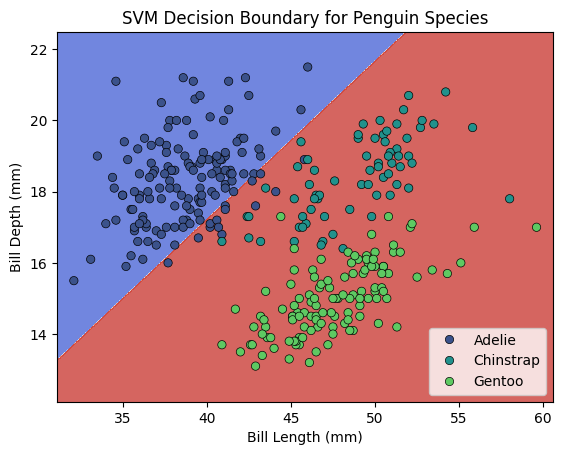

In [ ]:
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load penguin dataset from seaborn
penguins = sns.load_dataset('penguins')

# Display the first few rows and inspect the columns
print(penguins.head())

# Data preprocessing
# Drop rows with missing values
penguins.dropna(inplace=True)

# Select features (numerical only for simplicity)
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].values

# Encode categorical target variable 'species' to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Data preprocessing (scaling numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (corrected the test_size argument)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Classifier model (example with linear kernel)
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plotting the decision boundary (only for 2D data)
if X.shape[1] == 2:

    # Create a meshgrid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Plot decision boundary and margins
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=penguins['species'], palette='viridis', edgecolor='k')
    plt.xlabel("Bill Length (mm)")
    plt.ylabel('Bill Depth (mm)')
    plt.title('SVM Decision Boundary for Penguin Species')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("Cannot plot decision boundary for data with more than 2 features.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
try:
df = pd.read_csv( Student_Marks.csv )
except FileNotFoundError:
print("File not found. Creating a sample DataFrame.")
data = {'time_study': [1, 2, 3, 4, 5], 'Marks': [50, 60, 70, 80, 90]}
df = pd.DataFrame(data)
X, y = df[['time_study']].values, df['Marks'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Models
linear_model = LinearRegression().fit(X_train, y_train) # Underfitting
poly_model_over = LinearRegression().fit(PolynomialFeatures(10).fit_transform(X_train), y_train) # Overfitting
poly_model_appropriate = LinearRegression().fit(PolynomialFeatures(3).fit_transform(X_train), y_train) # Appropriate fit
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
# Plot models
plt.plot(X_range, linear_model.predict(X_range), color='orange', label='Linear Regression (Underfitting)')
plt.plot(X_range, poly_model_appropriate.predict(PolynomialFeatures(3).fit_transform(X_range)), color='black', label='Polynomial Re
plt.plot(X_range, poly_model_over.predict(PolynomialFeatures(10).fit_transform(X_range)), color='red', linestyle='--', label='Poly
plt.legend()
plt.show()

File not found. Creating a sample DataFrame.


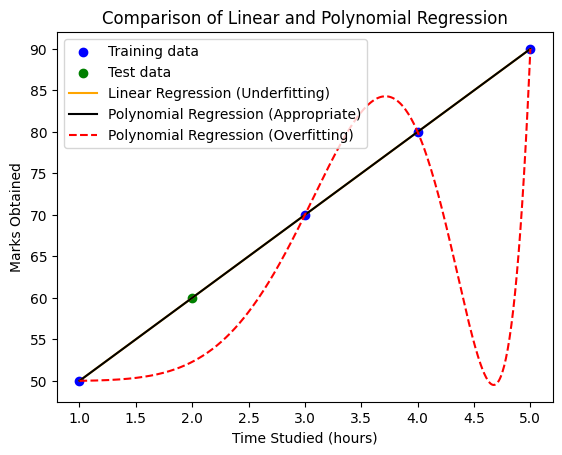

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Try to read the CSV file
try:
    df = pd.read_csv('Student_Marks.csv')
except FileNotFoundError:
    print("File not found. Creating a sample DataFrame.")
    data = {'time_study': [1, 2, 3, 4, 5], 'Marks': [50, 60, 70, 80, 90]}
    df = pd.DataFrame(data)

# Prepare the data
X, y = df[['time_study']].values, df['Marks'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
linear_model = LinearRegression().fit(X_train, y_train)  # Underfitting
poly_model_over = LinearRegression().fit(PolynomialFeatures(degree=10).fit_transform(X_train), y_train)  # Overfitting
poly_model_appropriate = LinearRegression().fit(PolynomialFeatures(degree=3).fit_transform(X_train), y_train)  # Appropriate fit

# Range for predictions
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot models
plt.plot(X_range, linear_model.predict(X_range), color='orange', label='Linear Regression (Underfitting)')
plt.plot(X_range, poly_model_appropriate.predict(PolynomialFeatures(degree=3).fit_transform(X_range)), color='black', label='Polynomial Regression (Appropriate)')
plt.plot(X_range, poly_model_over.predict(PolynomialFeatures(degree=10).fit_transform(X_range)), color='red', linestyle='--', label='Polynomial Regression (Overfitting)')

plt.title('Comparison of Linear and Polynomial Regression')
plt.xlabel('Time Studied (hours)')
plt.ylabel('Marks Obtained')
plt.legend()
plt.show()